In [1]:
# ============================
# 1. Import Library
# ============================

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Class imbalance handling
from sklearn.utils.class_weight import compute_class_weight

# Deep Learning (ANN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# ============================
# 2. Load & Inspect Dataset
# ============================

# Path dataset
data_path = r"C:\Users\Rahayu Febrianti\Downloads\ANN-FOREST\forest_health_data_with_target.csv"

# Load dataset
df = pd.read_csv(data_path)

# Tampilkan 5 baris pertama
print("===== 5 Baris Pertama Data =====")
display(df.head())

# Melihat ukuran dataset
print("\n===== Shape Dataset =====")
print(df.shape)

# Informasi struktur dataset
print("\n===== Info Dataset =====")
print(df.info())

# Statistik deskriptif kolom numerik
print("\n===== Statistik Deskriptif (Numerik) =====")
display(df.describe())

# Mengecek missing values
print("\n===== Missing Values per Kolom =====")
print(df.isnull().sum())

# Distribusi kelas target
print("\n===== Distribusi Kelas Health_Status =====")
print(df['Health_Status'].value_counts())


===== 5 Baris Pertama Data =====


,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy



===== Shape Dataset =====
(1000, 20)

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP        

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,288.819436,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,1.000000,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,250.750000,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,500.500000,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,750.250000,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,1000.000000,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163



===== Missing Values per Kolom =====
Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64

===== Distribusi Kelas Health_Status =====
Health_Status
Healthy         441
Unhealthy       322
Very Healthy    156
Sub-healthy      81
Name: count, dtype: int64


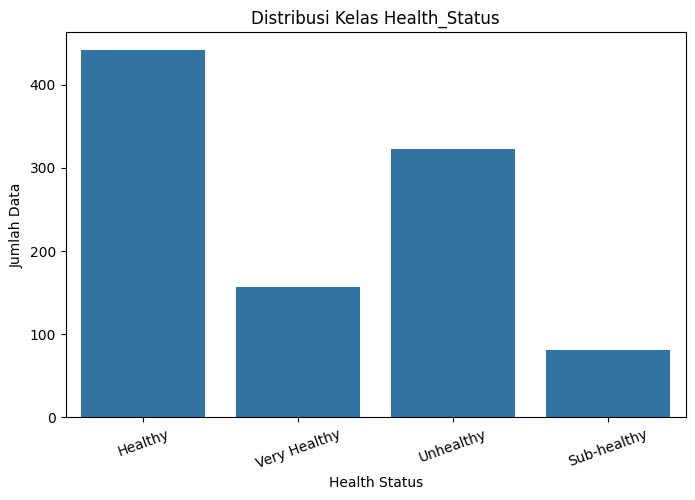

In [3]:
# ============================
# 3.1 Distribusi Kelas Target
# ============================

plt.figure(figsize=(8, 5))
sns.countplot(x='Health_Status', data=df)
plt.title('Distribusi Kelas Health_Status')
plt.xlabel('Health Status')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=20)
plt.show()


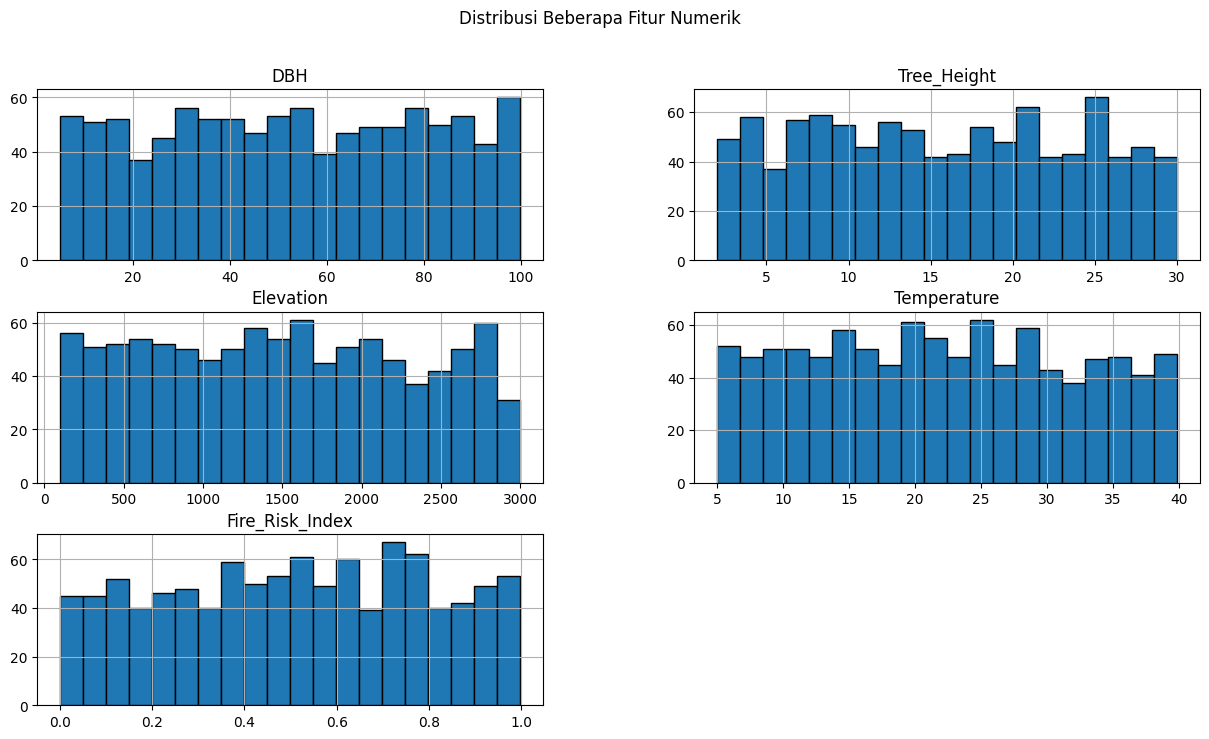

In [4]:
# ============================
# 3.2 Distribusi Fitur Numerik
# ============================

selected_features = [
    'DBH',
    'Tree_Height',
    'Elevation',
    'Temperature',
    'Fire_Risk_Index'
]

df[selected_features].hist(
    figsize=(15, 8),
    bins=20,
    edgecolor='black'
)

plt.suptitle('Distribusi Beberapa Fitur Numerik')
plt.show()


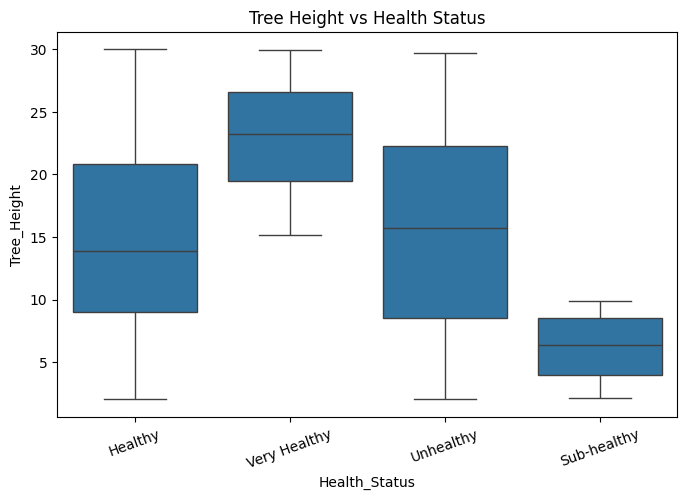

In [5]:
# ============================
# 3.3 Fitur vs Kelas
# ============================

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Health_Status',
    y='Tree_Height',
    data=df
)
plt.title('Tree Height vs Health Status')
plt.xticks(rotation=20)
plt.show()


In [6]:
# ============================
# 4.1 Pisahkan Fitur dan Target
# ============================

X = df.drop(columns=['Health_Status', 'Plot_ID'])
y = df['Health_Status']

print("Shape fitur (X):", X.shape)
print("Shape target (y):", y.shape)


Shape fitur (X): (1000, 18)
Shape target (y): (1000,)


In [7]:
# ============================
# 4.2 Encoding Target
# ============================

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Melihat mapping label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping label target:", label_mapping)


Mapping label target: {'Healthy': 0, 'Sub-healthy': 1, 'Unhealthy': 2, 'Very Healthy': 3}


In [8]:
# ============================
# 4.3 Train-Test Split (Stratified)
# ============================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (800, 18)
Test size : (200, 18)


In [9]:
# ============================
# 4.4 Feature Scaling
# ============================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# ============================
# 4.5 Hitung Class Weight
# ============================

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print("Class Weight:", class_weight_dict)


Class Weight: {0: 0.56657223796034, 1: 3.076923076923077, 2: 0.7782101167315175, 3: 1.6}


In [11]:
# ============================
# 5. Model Building
# ============================

model = Sequential()

# Input layer + Hidden Layer 1
model.add(Dense(
    units=64,
    activation='relu',
    input_shape=(X_train_scaled.shape[1],)
))

# Hidden Layer 2
model.add(Dense(
    units=32,
    activation='relu'
))

# (Opsional tapi aman) Dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Output Layer (Multi-class classification)
model.add(Dense(
    units=4,               # jumlah kelas
    activation='softmax'
))

# Ringkasan arsitektur model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3428 (13.39 KB)
Trainable params: 3428 (13.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# ============================
# 6. Model Compilation
# ============================

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model berhasil di-compile.")


Model berhasil di-compile.


In [19]:
tf.keras.backend.clear_session()


In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_ann_forest.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/200
20/20 [==============================] - 1s 9ms/step - loss: 1.4957 - accuracy: 0.1703 - val_loss: 1.4310 - val_accuracy: 0.2562
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.2771 - accuracy: 0.3031 - val_loss: 1.2976 - val_accuracy: 0.4000
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 1.1905 - accuracy: 0.3609 - val_loss: 1.2253 - val_accuracy: 0.4313
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.4328 - val_loss: 1.1471 - val_accuracy: 0.5000
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0233 - accuracy: 0.4797 - val_loss: 1.0739 - val_accuracy: 0.5437
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9617 - accuracy: 0.4859 - val_loss: 1.0131 - val_accuracy: 0.5437
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8993 - accuracy: 0.5297 - val_loss: 0.9530 - val_accuracy: 0.5875
Epoch 8/200
2

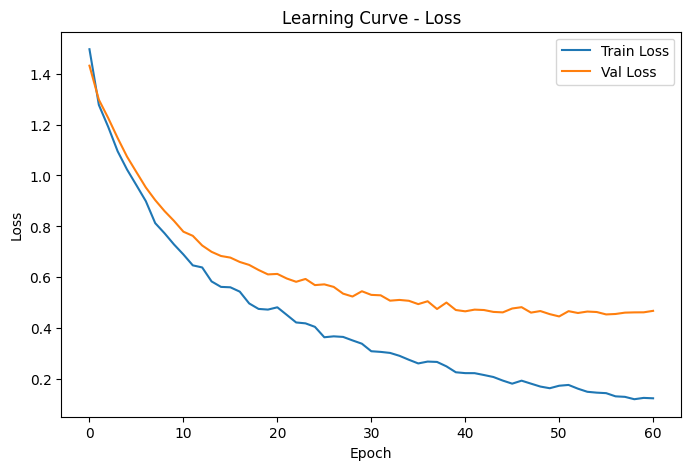

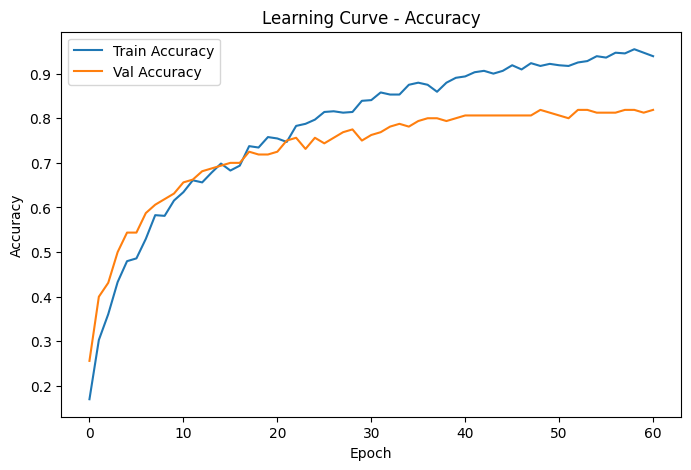

In [23]:
# ============================
# 8. Visualisasi Learning Curve
# ============================

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
# ============================
# 9.1 Prediksi Data Test
# ============================

# Prediksi probabilitas
y_pred_prob = model.predict(X_test_scaled)

# Konversi ke label kelas
y_pred = np.argmax(y_pred_prob, axis=1)


7/7 [==============================] - 0s 1ms/step


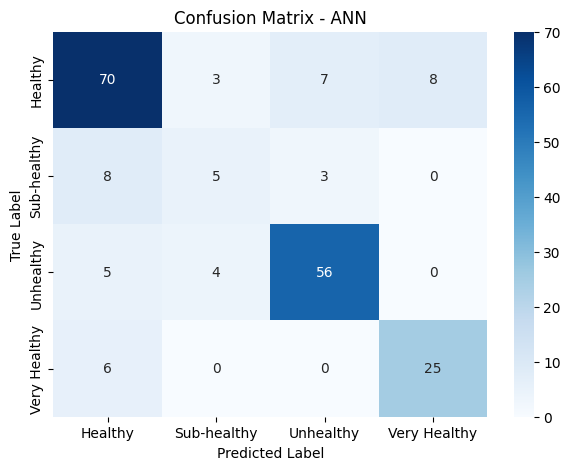

In [29]:
# ============================
# 9.2 Confusion Matrix
# ============================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN')
plt.show()


In [30]:
# ============================
# 9.3 Classification Report
# ============================

print("Classification Report:\n")
print(
    classification_report(
        y_test,
        y_pred,
        target_names=label_encoder.classes_
    )
)


Classification Report:

              precision    recall  f1-score   support

     Healthy       0.79      0.80      0.79        88
 Sub-healthy       0.42      0.31      0.36        16
   Unhealthy       0.85      0.86      0.85        65
Very Healthy       0.76      0.81      0.78        31

    accuracy                           0.78       200
   macro avg       0.70      0.69      0.70       200
weighted avg       0.77      0.78      0.78       200



In [31]:
import json, joblib
import numpy as np

# 1) simpan model (kalau kamu pakai ModelCheckpoint, file ini sudah ada)
model.save("best_ann_forest.keras")

# 2) simpan scaler
joblib.dump(scaler, "scaler.pkl")

# 3) simpan urutan kelas
with open("classes.json", "w") as f:
    json.dump(label_encoder.classes_.tolist(), f)

# 4) simpan urutan fitur (PENTING!)
feature_names = X.columns.tolist()  # X adalah df tanpa Plot_ID & Health_Status
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

print("Artifacts saved!")
print("Features:", feature_names)
print("Classes:", label_encoder.classes_)


Artifacts saved!
Features: ['Latitude', 'Longitude', 'DBH', 'Tree_Height', 'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope', 'Elevation', 'Temperature', 'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level', 'Fire_Risk_Index']
Classes: ['Healthy' 'Sub-healthy' 'Unhealthy' 'Very Healthy']
